In [1]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

In [2]:
img = Image.open('images/image.jpg')
img_np = np.array(img)
img_np.shape
red = img_np.copy()
red[:,:,1] = 0
red[:,:,2] = 0
green = img_np.copy()
green[:,:,0] = 0
green[:,:,2] = 0
blue = img_np.copy()
blue[:,:,0] = 0
blue[:,:,1] = 0

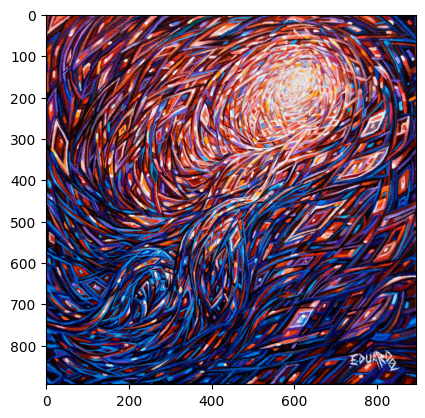

In [3]:
plt.imshow(img)

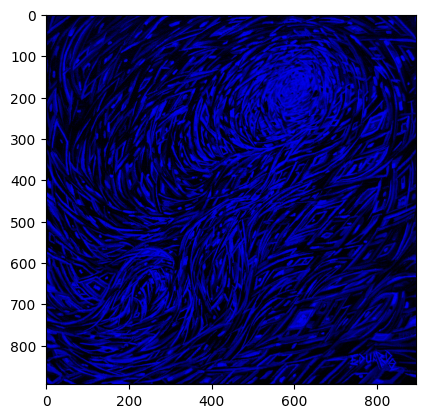

In [4]:
plt.imshow(blue)

In [57]:
def gaussian_filter(l=3, sig=1.):
    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    gauss = 1/(sig * np.sqrt(2 * np.pi)) * np.exp(-0.5 * np.square(ax) / np.square(sig))
    # print(f'{gauss = }')
    kernel = np.outer(gauss, gauss)
    # print(f'{kernel = }')
    # print(f'{kernel.sum() = }')
    kernel = kernel / kernel.sum()
    print(f'{kernel = }')
    # print(f'{kernel.sum() = }')
    return kernel

In [73]:
# kernel = np.array([[1/9, 1/9, 1/9],
#                    [1/9, 1/9, 1/9],
#                    [1/9, 1/9, 1/9]])
l = 50
kernel = (gaussian_filter(l, 12.)).flatten()
# kernel = (np.ones((l, l)) * 1/np.square(l)).flatten()

kernel = array([[1.84518723e-05, 2.17983114e-05, 2.55734507e-05, ...,
        2.55734507e-05, 2.17983114e-05, 1.84518723e-05],
       [2.17983114e-05, 2.57516622e-05, 3.02114623e-05, ...,
        3.02114623e-05, 2.57516622e-05, 2.17983114e-05],
       [2.55734507e-05, 3.02114623e-05, 3.54436326e-05, ...,
        3.54436326e-05, 3.02114623e-05, 2.55734507e-05],
       ...,
       [2.55734507e-05, 3.02114623e-05, 3.54436326e-05, ...,
        3.54436326e-05, 3.02114623e-05, 2.55734507e-05],
       [2.17983114e-05, 2.57516622e-05, 3.02114623e-05, ...,
        3.02114623e-05, 2.57516622e-05, 2.17983114e-05],
       [1.84518723e-05, 2.17983114e-05, 2.55734507e-05, ...,
        2.55734507e-05, 2.17983114e-05, 1.84518723e-05]])


In [16]:
def conv(array1, kernel):
    if not array1.shape == kernel.shape:
        raise ValueError(f'Arrays must be of the same shape: {array1.shape} and {kernel.shape}')
    return int((array1 * kernel).sum())

In [ ]:
from math import floor, ceil

In [74]:
new_img = np.zeros(
    img_np.shape,
    dtype=np.uint8
)

for y in range(floor(l/2), 894-floor(l/2)):
    for x in range(floor(l/2), 894-floor(l/2)):
        new_img[y, x] = np.array([
            conv(img_np[y-floor(l/2):y+ceil(l/2),x-floor(l/2):x+ceil(l/2),0].flatten(), kernel),
            conv(img_np[y-floor(l/2):y+ceil(l/2),x-floor(l/2):x+ceil(l/2),1].flatten(), kernel),
            conv(img_np[y-floor(l/2):y+ceil(l/2),x-floor(l/2):x+ceil(l/2),2].flatten(), kernel)
        ])

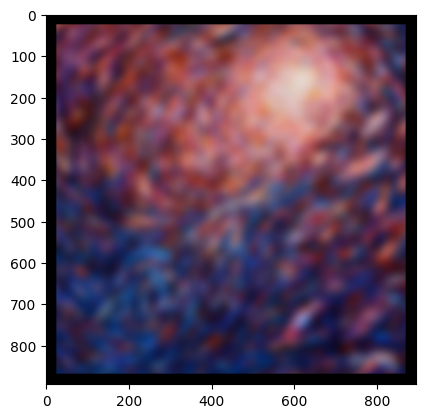

In [75]:
plt.imshow(new_img)

In [4]:
from scipy.signal import fftconvolve

In [89]:
kernel = gaussian_filter(50, 15.)

new_img = np.zeros(
    (943, 943, 3),
    dtype=np.uint8
)

new_img[:,:,0] = fftconvolve(img_np[:,:,0], kernel)
new_img[:,:,1] = fftconvolve(img_np[:,:,1], kernel)
new_img[:,:,2] = fftconvolve(img_np[:,:,2], kernel)

kernel = array([[6.00119632e-05, 6.67671101e-05, 7.39532265e-05, ...,
        7.39532265e-05, 6.67671101e-05, 6.00119632e-05],
       [6.67671101e-05, 7.42826389e-05, 8.22776485e-05, ...,
        8.22776485e-05, 7.42826389e-05, 6.67671101e-05],
       [7.39532265e-05, 8.22776485e-05, 9.11331576e-05, ...,
        9.11331576e-05, 8.22776485e-05, 7.39532265e-05],
       ...,
       [7.39532265e-05, 8.22776485e-05, 9.11331576e-05, ...,
        9.11331576e-05, 8.22776485e-05, 7.39532265e-05],
       [6.67671101e-05, 7.42826389e-05, 8.22776485e-05, ...,
        8.22776485e-05, 7.42826389e-05, 6.67671101e-05],
       [6.00119632e-05, 6.67671101e-05, 7.39532265e-05, ...,
        7.39532265e-05, 6.67671101e-05, 6.00119632e-05]])


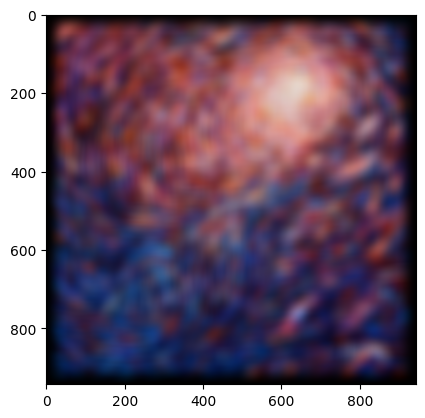

In [90]:
plt.imshow(new_img)

In [5]:
kernel = np.array([
    [-1/3, -1/3, -1/3],
    [0, 0, 0],
    [1/3, 1/3, 1/3],
])

new_img = np.zeros(
    (896, 896, 3),
    dtype=np.uint8
)

new_img[:,:,0] = fftconvolve(img_np[:,:,0], kernel)
new_img[:,:,1] = fftconvolve(img_np[:,:,1], kernel)
new_img[:,:,2] = fftconvolve(img_np[:,:,2], kernel)

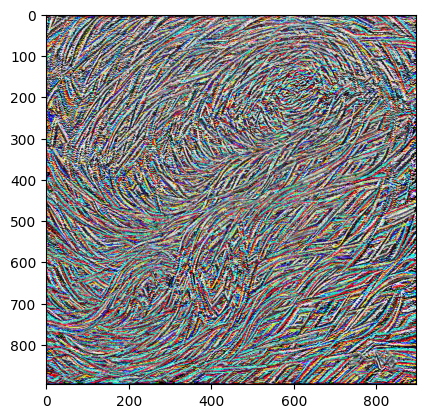

In [6]:
plt.imshow(new_img)

In [8]:
img_gray = Image.open('image.jpg').convert('L')
img_gray.save('image_gray.jpg')

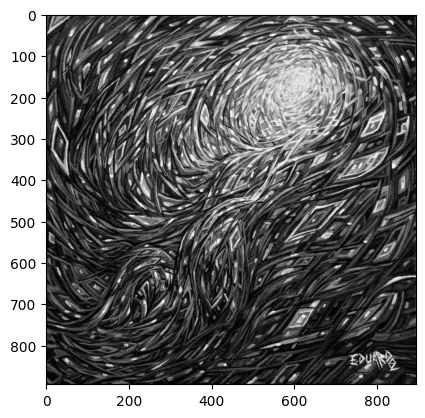

In [140]:
plt.imshow(img_gray, cmap='gray', vmin=0, vmax=255)

Show the left edges with red and right edges with blue

In [30]:
kernel = np.array([
    [1/4, 0, -1/4],
    [1/2, 0, -1/2],
    [1/4, 0, -1/4]
])

new_img_gray = np.zeros(
    (896, 896),
    dtype=np.int8
)

new_img_gray = fftconvolve(img_gray, kernel)
red = new_img_gray.copy()
np.place(red, red > 0, 0)
red = abs(red)
blue = new_img_gray.copy()
np.place(blue, blue < 0, 0)

new_img = np.zeros(
    (896, 896, 3),
    dtype=np.uint8
)
new_img[:,:,0] = red
new_img[:,:,2] = blue

blue_colors = blue.flatten()
red_colors = red.flatten()

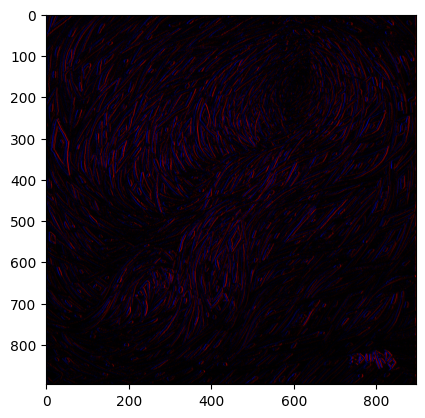

In [31]:
plt.imshow(new_img)

In [46]:
np.place(blue, blue > blue_colors.mean()+200, 255)
np.place(blue, blue <= blue_colors.mean()+200, 0)
np.place(red, red > red_colors.mean()+200, 255)
np.place(red, red <= red_colors.mean()+200, 0)
new_img = np.zeros(
    (896, 896, 3),
    dtype=np.uint8
)
new_img[:,:,0] = red
new_img[:,:,2] = blue

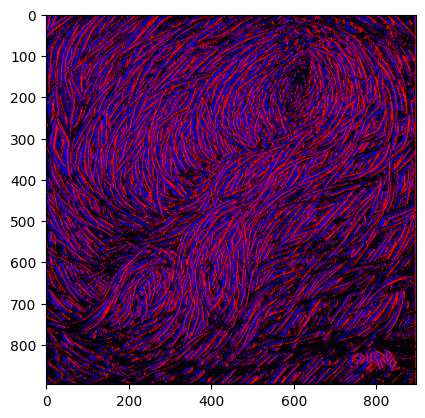

In [47]:
plt.imshow(new_img)

Show upper edges with blue and lower edges with red

In [149]:
kernel = np.array([
    [1/4, 1/2, 1/4],
    [0, 0, 0],
    [-1/4, -1/2, -1/4]
])

new_img_gray = np.zeros(
    (896, 896),
    dtype=np.int8
)

new_img_gray = fftconvolve(img_gray, kernel)
red = new_img_gray.copy()
np.place(red, red > 0, 0)
red = abs(red)
blue = new_img_gray.copy()
np.place(blue, blue < 0, 0)

new_img = np.zeros(
    (896, 896, 3),
    dtype=np.uint8
)
new_img[:,:,0] = red
new_img[:,:,2] = blue

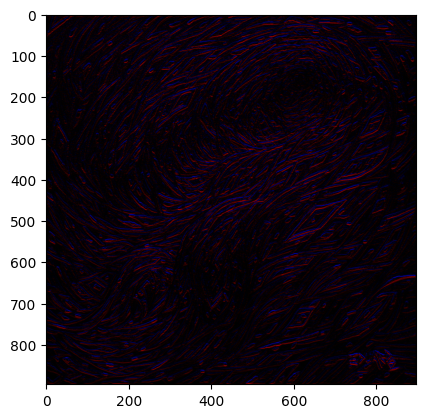

In [150]:
plt.imshow(new_img)